# EV Charging Station Usage

 Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("sUCCess")

sUCCess


File Upload

In [85]:

df = pd.read_excel("Datasets/raw/EV_CS.xlsx")
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (Â°C),Vehicle Age (years),Charger Type,location_type
0,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Residential
1,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Commercial
2,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Public
3,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Mall
4,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Highway


### EDA

In [86]:
print("Rows, Columns:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
print(df.info())


Rows, Columns: (1320, 19)

Columns:
 Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day',
       'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (Â°C)',
       'Vehicle Age (years)', 'Charger Type', 'location_type'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Vehicle Model                             1320 non-null   object        
 1   Battery Capacity (kWh)                    1320 non-null   float64       
 2   Charging Statio

In [87]:

print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (Â°C)                            0
Vehicle Age (years)                          0
Charger Type                                 0
location_type                                0
dtype: int64


In [88]:
print("\nBasic Statistics:")
print(df.describe(include="all"))


Basic Statistics:
        Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
count            1320             1320.000000                1320   
unique              5                     NaN                 462   
top     Tesla Model 3                     NaN         Station_108   
freq              280                     NaN                   9   
mean              NaN               74.534692                 NaN   
min               NaN                1.532807                 NaN   
25%               NaN               62.000000                 NaN   
50%               NaN               75.000000                 NaN   
75%               NaN               85.000000                 NaN   
max               NaN              193.003074                 NaN   
std               NaN               20.626914                 NaN   

       Charging Station Location  Charging Start Time  \
count                       1320                 1320   
unique                         5      

In [89]:
df["Charging Start Time"].dtype


dtype('<M8[ns]')

In [90]:
missing_rows_count = df.isnull().any(axis=1).sum()
print("Rows with missing values:", missing_rows_count)




Rows with missing values: 189


#### Data Cleaning 

This is to replace spaces to underscores in column names and to drop rows with all NaN values.

In [91]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df["charging_start_time"] = pd.to_datetime(
    df["charging_start_time"], errors="coerce"
)
df["charging_end_time"] = pd.to_datetime(
    df["charging_end_time"], errors="coerce"
)

# Removing rows with missing start or end time
df = df.dropna(
    subset=["charging_start_time", "charging_end_time"]
)

# Removing invalid sessions means those where end time is before start time
df = df[
    df["charging_end_time"] > df["charging_start_time"]
]

# Creating derived time features
df["charging_duration_minutes"] = (
    df["charging_end_time"] - df["charging_start_time"]
).dt.total_seconds() / 60

df["hour_of_day"] = df["charging_start_time"].dt.hour
df["day_of_week"] = df["charging_start_time"].dt.day_name()

# Remove fully empty rows
df = df.dropna(how="all")

In [92]:
df.drop(columns=['time_of_day'], inplace=True)


In [93]:
def assign_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['hour_of_day'].apply(assign_time_of_day)


In [94]:
df.shape

(1320, 21)

Removed all the rows having missing values for both Energy_consumed and charging_rate

In [95]:
indices = df[(df['energy_consumed_(kwh)'].isnull()) & (df['charging_rate_(kw)'].isnull())].index 
print('indices: ', indices)
df.drop(indices, inplace=True)

indices:  Index([265, 865, 900], dtype='int64')


Filling Missing Values by Median

In [96]:
df['energy_consumed_(kwh)'].fillna(df['energy_consumed_(kwh)'].median(), inplace=True)
df['charging_duration_minutes'].fillna(df['charging_duration_minutes'].median(), inplace=True)
df['charging_rate_(kw)'].fillna(df['charging_rate_(kw)'].median(), inplace=True)
df['distance_driven_(since_last_charge)_(km)'].fillna(df['distance_driven_(since_last_charge)_(km)'].median(), inplace=True)

C:\Users\Pranab Santra\AppData\Local\Temp\ipykernel_21280\1242825332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['energy_consumed_(kwh)'].fillna(df['energy_consumed_(kwh)'].median(), inplace=True)
C:\Users\Pranab Santra\AppData\Local\Temp\ipykernel_21280\1242825332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [97]:
df.head()

,vehicle_model,battery_capacity_(kwh),charging_station_id,charging_station_location,charging_start_time,charging_end_time,energy_consumed_(kwh),charging_duration_(hours),charging_rate_(kw),charging_cost_(usd),...,state_of_charge_(start_%),state_of_charge_(end_%),distance_driven_(since_last_charge)_(km),temperature_(â°c),vehicle_age_(years),charger_type,location_type,charging_duration_minutes,hour_of_day,time_of_day
0,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,...,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Residential,39.0,0,Night
1,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,...,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Commercial,121.0,1,Night
2,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,...,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Public,168.0,2,Night
3,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,...,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Mall,222.0,3,Night
4,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,...,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Highway,106.0,4,Night


In [98]:
df.shape

(1317, 21)

Filling null values for Energy Consumed with Estimated Energy Consumed 

In [99]:
df['Estimated Energy Consumed (kWh)'] = (df['charging_duration_minutes'] / 60) * df['charging_rate_(kw)']

df['energy_consumed_(kwh)'] = df['energy_consumed_(kwh)'].fillna(df['Estimated Energy Consumed (kWh)'])

#add column of charging cost per hour
df['Charging Cost Per Hour (USD)'] = df['charging_cost_(usd)'] / df['charging_duration_(hours)']

#drop na values that still exist
df = df.dropna()
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1317 entries, 0 to 1319
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   vehicle_model                             1317 non-null   object        
 1   battery_capacity_(kwh)                    1317 non-null   float64       
 2   charging_station_id                       1317 non-null   object        
 3   charging_station_location                 1317 non-null   object        
 4   charging_start_time                       1317 non-null   datetime64[ns]
 5   charging_end_time                         1317 non-null   datetime64[ns]
 6   energy_consumed_(kwh)                     1317 non-null   float64       
 7   charging_duration_(hours)                 1317 non-null   float64       
 8   charging_rate_(kw)                        1317 non-null   float64       
 9   charging_cost_(usd)                

Temperature Outliers

In [100]:

df['Temperature (°F)'] = (df['temperature_(â°c)'] * 9/5) + 32

temp_outliers = df.loc[df['Temperature (°F)'] > 105, ['Temperature (°F)', 'time_of_day', 'charging_station_location']]
print('temp_outliers: \n', temp_outliers)

#indices where temperature > 105 F
temp_indices = df[df['Temperature (°F)'] > 105].index 
print('temp_indices: ', temp_indices)

df.drop(temp_indices, inplace=True)

df.info()

temp_buckets = [0, 32, 45, 60, 75, 90, 105]
temp_categories = ['Below Freezing', 'Chilly', 'Cool', 'Mild', 'Hot', 'Sweltering']
df['Temperature Category'] = pd.cut(df['Temperature (°F)'], bins=temp_buckets, labels=temp_categories)

df.head()
df.shape

temp_outliers: 
       Temperature (°F) time_of_day charging_station_location
35          139.877553     Morning                  New York
113         108.931390   Afternoon               Los Angeles
183         136.589443   Afternoon             San Francisco
437         114.356026       Night                   Houston
739         105.470133     Evening               Los Angeles
832         117.172717   Afternoon             San Francisco
842         122.979098       Night             San Francisco
851         157.074688     Morning               Los Angeles
915         107.404352       Night                   Chicago
923         106.413942     Morning                  New York
971         116.242415     Morning                   Chicago
1045        163.705258   Afternoon                   Houston
temp_indices:  Index([35, 113, 183, 437, 739, 832, 842, 851, 915, 923, 971, 1045], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1319
Data columns (total 24 

(1305, 25)

Removing rows for consisting Invalid Values of percentage

In [101]:
df = df[
    (df['state_of_charge_(start_%)'].between(0, 100)) &
    (df['state_of_charge_(end_%)'].between(0, 100))
]


Outliers Problem by IQR

In [102]:
def iqr_outlier_mask(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[col] < lower) | (df[col] > upper)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

exclude_cols = [
    'State of Charge (Start %)',
    'State of Charge (End %)'
]

outlier_cols = [col for col in numeric_cols if col not in exclude_cols]

outlier_mask = False

for col in outlier_cols:
    outlier_mask |= iqr_outlier_mask(df, col)


In [103]:
df.isna().sum()

vehicle_model                               0
battery_capacity_(kwh)                      0
charging_station_id                         0
charging_station_location                   0
charging_start_time                         0
charging_end_time                           0
energy_consumed_(kwh)                       0
charging_duration_(hours)                   0
charging_rate_(kw)                          0
charging_cost_(usd)                         0
day_of_week                                 0
state_of_charge_(start_%)                   0
state_of_charge_(end_%)                     0
distance_driven_(since_last_charge)_(km)    0
temperature_(â°c)                           0
vehicle_age_(years)                         0
charger_type                                0
location_type                               0
charging_duration_minutes                   0
hour_of_day                                 0
time_of_day                                 0
Estimated Energy Consumed (kWh)   

In [104]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1319
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   vehicle_model                             1274 non-null   object        
 1   battery_capacity_(kwh)                    1274 non-null   float64       
 2   charging_station_id                       1274 non-null   object        
 3   charging_station_location                 1274 non-null   object        
 4   charging_start_time                       1274 non-null   datetime64[ns]
 5   charging_end_time                         1274 non-null   datetime64[ns]
 6   energy_consumed_(kwh)                     1274 non-null   float64       
 7   charging_duration_(hours)                 1274 non-null   float64       
 8   charging_rate_(kw)                        1274 non-null   float64       
 9   charging_cost_(usd)                

In [105]:
df[['state_of_charge_(start_%)', 'state_of_charge_(end_%)', 'temperature_(â°c)']].describe()


,state_of_charge_(start_%),state_of_charge_(end_%),temperature_(â°c)
count,1274.000000,1274.000000,1274.000000
mean,48.758778,74.217324,14.907050
std,23.367386,15.627691,14.431911
min,2.325959,7.604224,-10.724770
25%,27.802898,61.816958,2.599719
50%,47.985596,75.020850,14.461315
75%,68.816061,87.528930,27.779574
max,98.332795,99.986604,40.255497


In [106]:
df.shape

(1274, 25)

Exporting

In [107]:
df.to_csv("Datasets/preprocessed/EV_preprocessed.csv", index=False)

Plotting 

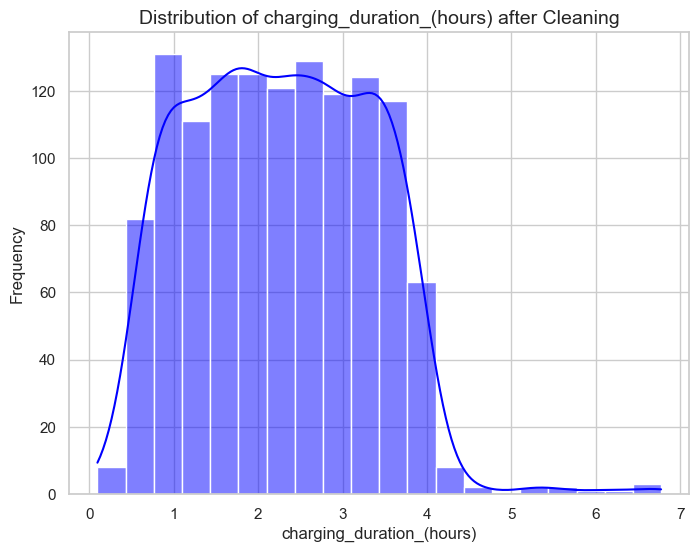

In [108]:
plt.figure(figsize=(8,6))
sns.histplot(df['charging_duration_(hours)'], bins=20, kde=True, color='blue')
plt.title('Distribution of charging_duration_(hours) after Cleaning', fontsize=14)
plt.xlabel('charging_duration_(hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

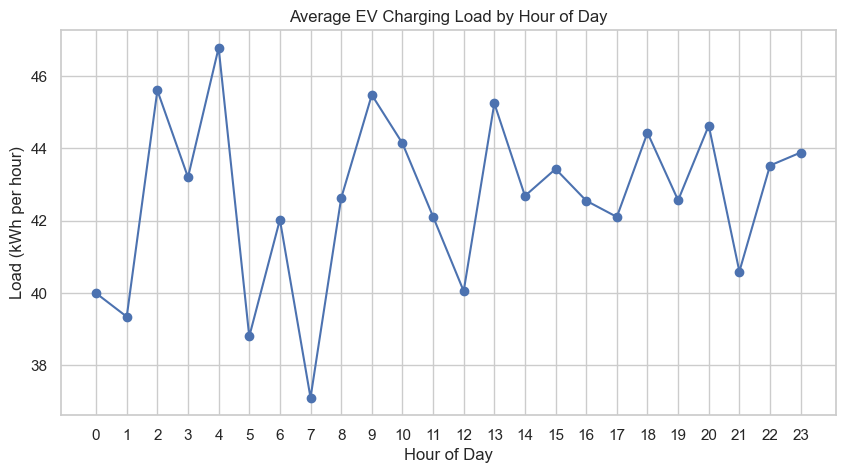

In [109]:
profile_by_hour = df.groupby('hour_of_day')['energy_consumed_(kwh)'].mean()

plt.figure(figsize=(10,5))
profile_by_hour.plot(marker="o")

plt.title("Average EV Charging Load by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Load (kWh per hour)")
plt.grid(True)

plt.xticks(ticks=range(24))

plt.show()

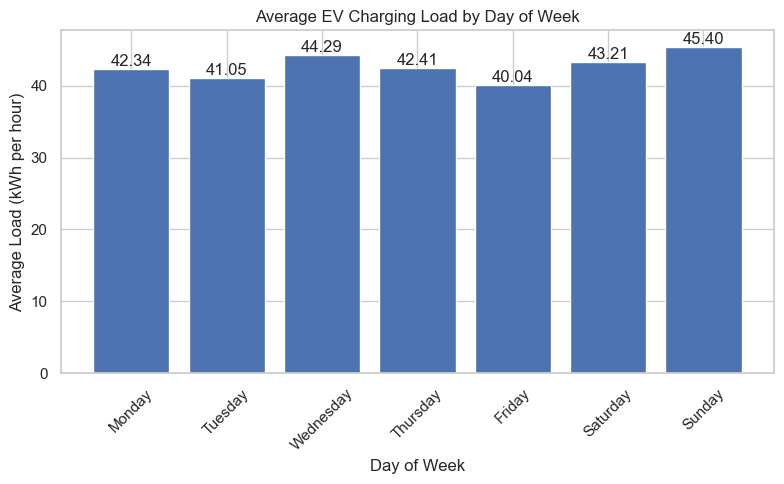

In [110]:
import matplotlib.pyplot as plt

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_load = df.groupby('day_of_week')['energy_consumed_(kwh)'].mean().reindex(weekday_labels)

plt.figure(figsize=(8,5))

ax = plt.bar(weekday_labels, avg_load)

plt.title("Average EV Charging Load by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Load (kWh per hour)")

plt.xticks(rotation=45)

# Add value labels
for bar in ax:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


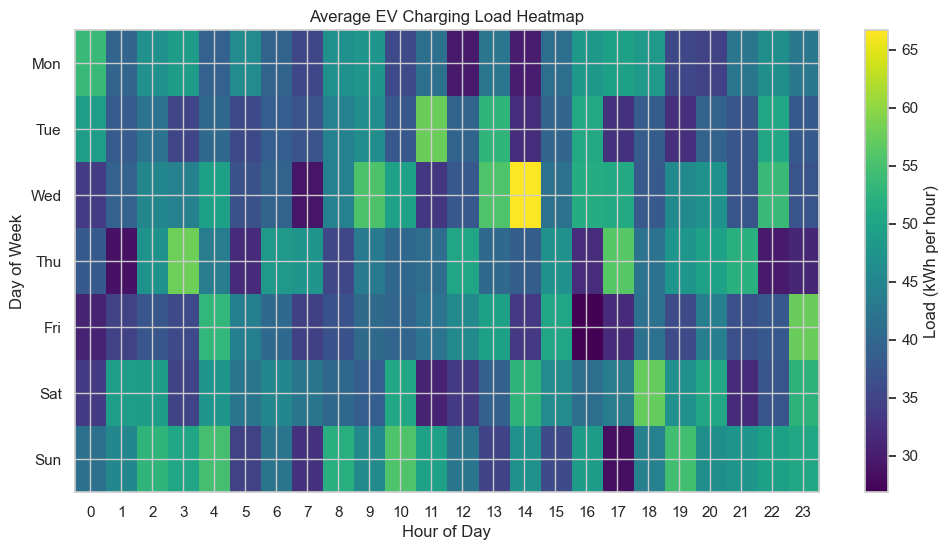

In [111]:
# Heatmap: weekday vs hour of day
load_profile = df.set_index('charging_start_time')['energy_consumed_(kwh)']
heatmap_data = load_profile.groupby([load_profile.index.dayofweek, load_profile.index.hour]).mean().unstack()
plt.figure(figsize=(12,6))
plt.imshow(heatmap_data, aspect="auto", cmap="viridis")
plt.colorbar(label="Load (kWh per hour)")
plt.xticks(range(24), range(24))
plt.yticks(range(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.title("Average EV Charging Load Heatmap")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [112]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1319
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   vehicle_model                             1274 non-null   object        
 1   battery_capacity_(kwh)                    1274 non-null   float64       
 2   charging_station_id                       1274 non-null   object        
 3   charging_station_location                 1274 non-null   object        
 4   charging_start_time                       1274 non-null   datetime64[ns]
 5   charging_end_time                         1274 non-null   datetime64[ns]
 6   energy_consumed_(kwh)                     1274 non-null   float64       
 7   charging_duration_(hours)                 1274 non-null   float64       
 8   charging_rate_(kw)                        1274 non-null   float64       
 9   charging_cost_(usd)                